# Sentiment analysis

##### Author: Rina RANARISON
##### www.rina-corp.xyz
##### www.github.com/ryurina

In [57]:
import pandas as pd
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

## Loading "British Airways Reviews" data

In [5]:
df = pd.read_csv('data/BA_reviews.csv')
df.head()

,Unnamed: 0,reviews
0,0,"Not Verified | Just returned from Chicago, fle..."
1,1,✅ Trip Verified | BA standards continue to de...
2,2,Not Verified | Awful. Business class check in...
3,3,✅ Trip Verified | Not a reliable airline. You...
4,4,✅ Trip Verified | I take comfort in reading t...


## Getting rid of the "verified" stuff

In [41]:
print(len(df['reviews']))
text = df['reviews'][2].replace('Not ', '').replace('Verified | ', '').replace('✅ Trip ', '')
print(text)

1000
 Awful. Business class check in queue just as long as for economy, probably because half of the desks were not staffed and Terminal 5 is chaotic. Business lounge overfull, couldn't get seats. Delayed flight, unmanaged chaos at the gate. No drink on boarding, first drink served an hour after take-off. The meal was poor, used to get better in economy on other airlines. British Airways has won the race to the bottom of the cheapskate stakes. looking forward to the flight home.


## Sentiment analysis

In [43]:
blob = TextBlob(text)
print(blob)
sentiment = blob.sentiment.polarity
print(sentiment)

 Awful. Business class check in queue just as long as for economy, probably because half of the desks were not staffed and Terminal 5 is chaotic. Business lounge overfull, couldn't get seats. Delayed flight, unmanaged chaos at the gate. No drink on boarding, first drink served an hour after take-off. The meal was poor, used to get better in economy on other airlines. British Airways has won the race to the bottom of the cheapskate stakes. looking forward to the flight home.
-0.12395833333333334


## Generalization of the Sentiment analysis

In [44]:
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [46]:
arr = []
for i in range(len(df['reviews'])):
    text = df['reviews'][i].replace('Not ', '').replace('Verified | ', '').replace('✅ Trip ', '')
    arr += [sentiment_analysis(text)]

len(arr)

1000

In [58]:
neg_review = 0
pos_review = 0
neu_review = 0

for i in arr:
    if round(i, 2) > 0:
        pos_review += 1
    else:
        if round(i, 2) < 0:
            neg_review += 1
        else:
            neu_review += 1

print(f'neg = {neg_review} | neu = {neu_review} | pos = {pos_review} | ')

neg = 331 | neu = 34 | pos = 635 | 


## Online reviews of British Airways

([<matplotlib.patches.Wedge at 0x7fd8ba847450>,
 [Text(0.556968287377953, 0.9485706757302115, 'Negative'),
  Text(-0.6353299803222909, 0.8979731711491594, 'Neutral'),
  Text(-0.452665811361303, -1.0025435966702962, 'Postive')])

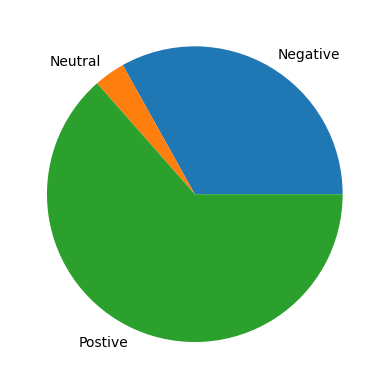

In [59]:
labels = 'Negative', 'Neutral', 'Postive'
sizes = [neg_review, neu_review, pos_review]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)